In this project, we will create an algorithm to predict fake news. The main purpose is to use Passive-Aggressive algorithms. Passive-Aggressive algorithms are generally used for large-scale learning. It is one of the few ‘online-learning algorithms‘. In online machine learning algorithms, the input data comes in sequential order and the machine learning model is updated step-by-step, as opposed to batch learning, where the entire training dataset is used at once. This is very useful in situations where there is a huge amount of data and it is computationally infeasible to train the entire dataset because of the sheer size of the data. We can simply say that an online-learning algorithm will get a training example, update the classifier, and then throw away the example. A very good example of this would be to detect fake news on a social media website like Twitter, where new data is being added every second. To dynamically read data from Twitter continuously, the data would be huge, and using an online-learning algorithm would be ideal [ https://www.geeksforgeeks.org/passive-aggressive-classifiers/  ].

## 1.Data Loading

In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import itertools

In [2]:
df = pd.read_csv("news.csv")

In [3]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
df.shape

(6335, 4)

In [5]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [6]:
df.isnull().sum()  # No missing data

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [7]:
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

<AxesSubplot:>

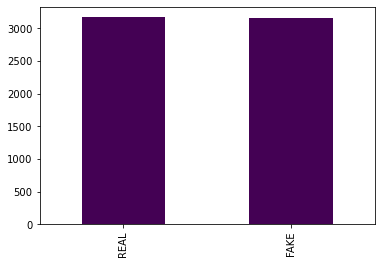

In [8]:
df['label'].value_counts().plot.bar(cmap="viridis")   # well balanced data

## 2. Model Building

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, plot_confusion_matrix

In [10]:
X = df["text"]
y = df["label"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [12]:
#Initialize a TfidfVectorizer
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
X_train = tfidf_vectorizer.fit_transform(X_train) 
X_test = tfidf_vectorizer.transform(X_test)

In [13]:
# Building model
#Initialize a PassiveAggressiveClassifier
model = PassiveAggressiveClassifier(max_iter=100)
model.fit(X_train,y_train)

PassiveAggressiveClassifier(max_iter=100)

In [14]:
#Predict on the test set and calculate accuracy
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)

print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.53%


In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        FAKE       0.92      0.95      0.93       614
        REAL       0.95      0.92      0.94       653

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267



In [16]:
#Build confusion matrix
confusion_matrix(y_test,y_pred)

array([[585,  29],
       [ 53, 600]], dtype=int64)

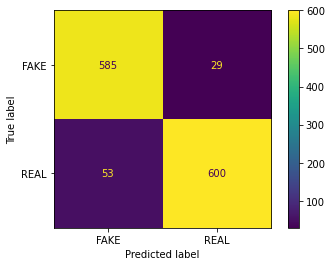

In [17]:
plot_confusion_matrix(model, X_test,y_test)